In [1]:
#Import the packages
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df

In [2]:
#Load the entire json file as dictionary.
customer_data = []
for line in open('G:\DataCamp Material\customersdata.json', 'r'):
    customer_data.append(json.loads(line))

In [3]:
#normalising the json data
customer_data = json_normalize(data = customer_data)
customer_data.head()

,fraudulent,orders,paymentMethods,transactions,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress
0,False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb...",josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg...",evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3...",andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,False,"[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz...",rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,True,"[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h...",uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."


In [4]:
#normalizing the nested orders 
new_df_order = pd.concat([pd.DataFrame(json_normalize(x)) for x in customer_data['orders']],ignore_index = True)
new_df_order.head(3)


,orderId,orderAmount,orderState,orderShippingAddress
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"


In [5]:
new_df_order.shape

(478, 4)

In [6]:
#normalizing the nested dictinaries of payment
new_df_payment = pd.concat([pd.DataFrame(json_normalize(x)) for x in customer_data['paymentMethods']],ignore_index = True)
new_df_payment.head()


,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,m52tx8e1s,False,card,Mastercard,Vertex Bancorp


In [7]:
new_df_payment.shape

(342, 5)

In [8]:
#normalizing the nested dictionaries of transactions
new_df_transaction = pd.concat([pd.DataFrame(json_normalize(x)) for x in customer_data['transactions']],ignore_index = True)
new_df_transaction.head(3)

,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed
0,a9lcj51r,vjbdvd,wt07xm68b,18,False
1,y4wcv03i,yp6x27,wt07xm68b,26,False
2,5mi94sfw,nlghpa,41ug157xz,45,False


In [9]:
new_df_transaction.shape


(623, 5)

In [10]:
#merging orders and transactions based on   orderId
order_transaction = pd.merge(new_df_order,new_df_transaction, on = 'orderId')
order_transaction.head(3)

,orderId,orderAmount,orderState,orderShippingAddress,transactionId,paymentMethodId,transactionAmount,transactionFailed
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,wt07xm68b,18,False
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,wt07xm68b,26,False
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",5mi94sfw,41ug157xz,45,False


In [11]:
order_transaction.shape

(623, 8)

In [12]:
order_transaction

,orderId,orderAmount,orderState,orderShippingAddress,transactionId,paymentMethodId,transactionAmount,transactionFailed
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,wt07xm68b,18,False
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,wt07xm68b,26,False
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",5mi94sfw,41ug157xz,45,False
3,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,41ug157xz,23,False
4,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",a33145ss,y3xp697jx,43,True
...,...,...,...,...,...,...,...,...
618,1bubxa,25,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7yilsi1o,7yen1m1q8,25,True
619,1bubxa,25,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",wmh52bns,3zmkegkb8,25,True
620,1bubxa,25,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",c82k5bcv,7yen1m1q8,25,False
621,p0gdbf,19,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",xdw33hfp,3zmkegkb8,19,False


In [13]:
new_df_payment['paymentMethodId'].isin(order_transaction['paymentMethodId']).value_counts()

True     237
False    105
Name: paymentMethodId, dtype: int64

In [14]:
#merging the orders,transactions and payments based on paymenMethodId
clubbed_payment_order_trans = order_transaction.merge(new_df_payment,on = 'paymentMethodId')
clubbed_payment_order_trans.shape

(623, 12)

In [15]:
#renaming the shipping address with billing address to merge the datasets
clubbed_payment_order_trans.rename(columns = {'orderShippingAddress':'customer.customerBillingAddress'},inplace = True)
clubbed_payment_order_trans.head()

,orderId,orderAmount,orderState,customer.customerBillingAddress,transactionId,paymentMethodId,transactionAmount,transactionFailed,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,wt07xm68b,18,False,True,card,JCB 16 digit,Citizens First Banks
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,wt07xm68b,26,False,True,card,JCB 16 digit,Citizens First Banks
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",5mi94sfw,41ug157xz,45,False,False,bitcoin,American Express,Bastion Banks
3,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,41ug157xz,23,False,False,bitcoin,American Express,Bastion Banks
4,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",a33145ss,y3xp697jx,43,True,True,bitcoin,VISA 16 digit,Solace Banks


In [16]:
#merging the dataframes based on customer billing address
final_data = customer_data.merge(clubbed_payment_order_trans,on = 'customer.customerBillingAddress')
final_data.shape

(423, 20)

In [17]:
final_data.head()

,fraudulent,orders,paymentMethods,transactions,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,orderId,orderAmount,orderState,transactionId,paymentMethodId,transactionAmount,transactionFailed,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb...",josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,a9lcj51r,wt07xm68b,18,False,True,card,JCB 16 digit,Citizens First Banks
1,False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb...",josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26,fulfilled,y4wcv03i,wt07xm68b,26,False,True,card,JCB 16 digit,Citizens First Banks
2,True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg...",evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,uw0eeb,23,fulfilled,br8ba1nu,41ug157xz,23,False,False,bitcoin,American Express,Bastion Banks
3,False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3...",andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",yk34y2,33,failed,q3lyvbza,8pneoi03z,33,False,False,card,JCB 16 digit,Bastion Banks
4,False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3...",andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",28v6b0,24,fulfilled,3alf9irw,8pneoi03z,24,True,False,card,JCB 16 digit,Bastion Banks


In [18]:
#dropping the unwanted variables
final_data.drop(['orders','paymentMethods','transactions'],axis = 1,inplace = True)
final_data.shape

(423, 17)

In [19]:
final_data.head()

,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,orderId,orderAmount,orderState,transactionId,paymentMethodId,transactionAmount,transactionFailed,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,a9lcj51r,wt07xm68b,18,False,True,card,JCB 16 digit,Citizens First Banks
1,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26,fulfilled,y4wcv03i,wt07xm68b,26,False,True,card,JCB 16 digit,Citizens First Banks
2,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,uw0eeb,23,fulfilled,br8ba1nu,41ug157xz,23,False,False,bitcoin,American Express,Bastion Banks
3,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",yk34y2,33,failed,q3lyvbza,8pneoi03z,33,False,False,card,JCB 16 digit,Bastion Banks
4,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",28v6b0,24,fulfilled,3alf9irw,8pneoi03z,24,True,False,card,JCB 16 digit,Bastion Banks


In [20]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 17 columns):
fraudulent                          423 non-null bool
customer.customerEmail              423 non-null object
customer.customerPhone              423 non-null object
customer.customerDevice             423 non-null object
customer.customerIPAddress          423 non-null object
customer.customerBillingAddress     423 non-null object
orderId                             423 non-null object
orderAmount                         423 non-null int64
orderState                          423 non-null object
transactionId                       423 non-null object
paymentMethodId                     423 non-null object
transactionAmount                   423 non-null int64
transactionFailed                   423 non-null bool
paymentMethodRegistrationFailure    423 non-null bool
paymentMethodType                   423 non-null object
paymentMethodProvider               423 non-null object
payment

In [21]:
#example code to check the validity of the ip address
from ip2geotools.databases.noncommercial import DbIpCity
response = DbIpCity.get('8.129.104.40',api_key = 'free')
response.region

'Beijing'

In [22]:
ip_address = final_data['customer.customerIPAddress']
len(ip_address)

423

In [23]:
#function to extract region from Ipaddress

def get_region(ip):
    try:
        x = DbIpCity.get(ip, api_key = 'free')
    except KeyError:
        return pd.np.nan
    try:
        return x.region if x else pd.np.nan
    except KeyError:
        return pd.np.nan

In [24]:
region = map(get_region,ip_address)

In [25]:
region = list(region)
print(len(region))

423


In [26]:
#function to extract country from Ipaddress

def get_country(ip):
    try:
        x = DbIpCity.get(ip, api_key = 'free')
    except KeyError:
        return pd.np.nan
    try:
        return x.country if x else pd.np.nan
    except KeyError:
        return pd.np.nan
    

In [27]:
country = map(get_country,ip_address)
country = list(country)
print(len(country))

423


In [28]:
#adding region and country as new columns to our dataset
final_data['region'] = region
final_data['country'] = country
final_data.shape       

(423, 19)

In [29]:
#filling NaN with unknown
final_data.region.fillna('unknown',inplace = True)

In [30]:
final_data.country.fillna('unknown',inplace = True)

In [31]:
final_data.head()

,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,orderId,orderAmount,orderState,transactionId,paymentMethodId,transactionAmount,transactionFailed,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,region,country
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,a9lcj51r,wt07xm68b,18,False,True,card,JCB 16 digit,Citizens First Banks,Beijing,CN
1,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26,fulfilled,y4wcv03i,wt07xm68b,26,False,True,card,JCB 16 digit,Citizens First Banks,Beijing,CN
2,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,uw0eeb,23,fulfilled,br8ba1nu,41ug157xz,23,False,False,bitcoin,American Express,Bastion Banks,Tokyo,JP
3,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",yk34y2,33,failed,q3lyvbza,8pneoi03z,33,False,False,card,JCB 16 digit,Bastion Banks,Fribourg,CH
4,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",28v6b0,24,fulfilled,3alf9irw,8pneoi03z,24,True,False,card,JCB 16 digit,Bastion Banks,Fribourg,CH


In [32]:
final_data.columns

Index(['fraudulent', 'customer.customerEmail', 'customer.customerPhone',
       'customer.customerDevice', 'customer.customerIPAddress',
       'customer.customerBillingAddress', 'orderId', 'orderAmount',
       'orderState', 'transactionId', 'paymentMethodId', 'transactionAmount',
       'transactionFailed', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'paymentMethodIssuer',
       'region', 'country'],
      dtype='object')

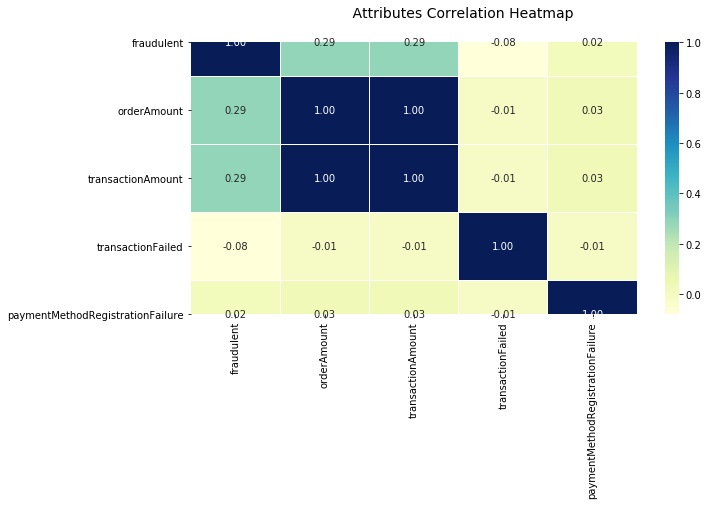

In [59]:
#lets observe the correlations matrix of the variables
import matplotlib.pyplot as plt
import seaborn as sns
f , ax = plt.subplots(figsize = (10,5))
corr = final_data.corr()
heatmap = sns.heatmap(round(corr,2),annot = True,ax = ax,cmap = 'YlGnBu',fmt = '.2f',linewidths = .05)
t= f.suptitle(' Attributes Correlation Heatmap', fontsize=14)

In [34]:
#most of the fraud transactions happened through card payment method type
import matplotlib.pyplot as plt
Methodtype_fraud = pd.crosstab(final_data['fraudulent'],final_data['paymentMethodType'])
Methodtype_fraud

paymentMethodType,apple pay,bitcoin,card,paypal
fraudulent,,,,
False,24,17,189,32
True,15,17,123,6


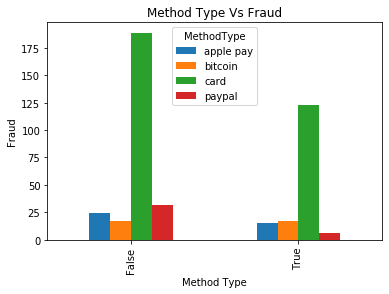

In [35]:
Methodtype_fraud.plot.bar()
plt.legend(title = 'MethodType')
plt.title('Method Type Vs Fraud')
plt.ylabel('Fraud')
plt.xlabel('Method Type')
plt.show()

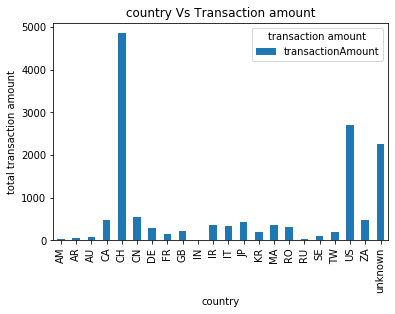

In [36]:
# china,US  are the countries form which maximum transaction happened and from one unknown ip address we have maximum transactions
final_data.groupby('country')['transactionAmount'].sum().plot.bar()
plt.title('country Vs Transaction amount')
plt.ylabel('total transaction amount')
plt.legend(title = 'transaction amount')
plt.show()

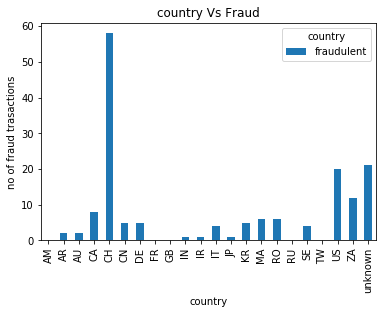

In [37]:
# below plot shows from which countries maximum fraud has happened
final_data.groupby('country')['fraudulent'].sum().plot.bar()
plt.title('country Vs Fraud')
plt.ylabel('no of fraud trasactions')
plt.legend(title = 'country')
plt.show()

In [38]:
orderstate = pd.crosstab(final_data['fraudulent'],final_data['orderState'])
orderstate

orderState,failed,fulfilled,pending
fraudulent,,,
False,25,221,16
True,19,134,8


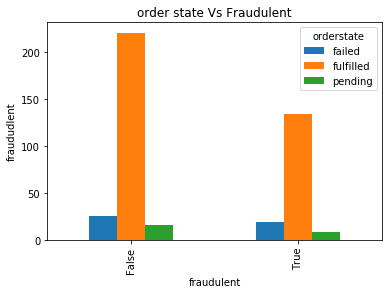

In [39]:
orderstate.plot.bar()
plt.title('order state Vs Fraudulent')
plt.ylabel('fraududlent')
plt.legend(title = 'orderstate')
plt.show()

In [40]:
#Lets analyse the relationship between paymentMethodIssuer attribute with the target.here we can see that the issuers with single
#values are fraud and for "Bulwark Trust Corp" the fraud is more than genuine orders
Issuer= pd.crosstab(final_data.fraudulent, final_data['paymentMethodIssuer'])
Issuer

paymentMethodIssuer,B,Bastion Banks,Bulwark Trust Corp.,Citizens First Banks,Fountain Financial Inc.,Grand Credit Corporation,Her Majesty Trust,His Majesty Bank Corp.,Rose Bancshares,Solace Banks,Vertex Bancorp,a,c,e,o,r,x
fraudulent,,,,,,,,,,,,,,,,,
False,0,31,11,18,30,33,40,29,22,19,29,0,0,0,0,0,0
True,9,17,20,16,18,6,5,11,21,12,10,2,5,5,1,1,2


In [41]:
# analysing paymentMethodProvider and fraud count
provider= pd.crosstab(final_data.fraudulent, final_data['paymentMethodProvider'])
provider

paymentMethodProvider,American Express,Diners Club / Carte Blanche,Discover,JCB 15 digit,JCB 16 digit,Maestro,Mastercard,VISA 13 digit,VISA 16 digit,Voyager
fraudulent,,,,,,,,,,
False,24,24,18,22,43,46,10,17,36,22
True,15,10,11,8,27,13,5,25,29,18


In [42]:
trans= pd.crosstab(final_data.fraudulent, final_data['paymentMethodRegistrationFailure'])
trans

paymentMethodRegistrationFailure,False,True
fraudulent,,
False,224,38
True,135,26


In [43]:
#there are 21 orders placed by "johnlowery@gmail.com" and all of them are fraud
final_data.loc[final_data['customer.customerEmail'] == 'johnlowery@gmail.com','fraudulent'].sum()

21

In [44]:
final_data.columns

Index(['fraudulent', 'customer.customerEmail', 'customer.customerPhone',
       'customer.customerDevice', 'customer.customerIPAddress',
       'customer.customerBillingAddress', 'orderId', 'orderAmount',
       'orderState', 'transactionId', 'paymentMethodId', 'transactionAmount',
       'transactionFailed', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'paymentMethodIssuer',
       'region', 'country'],
      dtype='object')

In [45]:
#Lets build a classification model 
#lets removed all the variables which are of no use to us
drop_variables = ['customer.customerEmail','customer.customerPhone','customer.customerDevice', 'customer.customerIPAddress','customer.customerBillingAddress', 'orderId','transactionId', 'paymentMethodId','transactionAmount','region']
model_data = final_data.drop(drop_variables,axis = True)


In [46]:
model_data.columns
data = ['fraudulent', 'orderState', 'transactionFailed',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer', 'country']
for i in data:
    model_data[i] = model_data[i].astype('category')
model_data.dtypes

fraudulent                          category
orderAmount                            int64
orderState                          category
transactionFailed                   category
paymentMethodRegistrationFailure    category
paymentMethodType                   category
paymentMethodProvider               category
paymentMethodIssuer                 category
country                             category
dtype: object

In [47]:
target = final_data['fraudulent']
print(model_data.shape)
print(target.shape)

(423, 9)
(423,)


In [48]:
#dropping the target variable
model_data.drop(['fraudulent'],axis = 1,inplace = True)
model_data

,orderAmount,orderState,transactionFailed,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,country
0,18,pending,False,True,card,JCB 16 digit,Citizens First Banks,CN
1,26,fulfilled,False,True,card,JCB 16 digit,Citizens First Banks,CN
2,23,fulfilled,False,False,bitcoin,American Express,Bastion Banks,JP
3,33,failed,False,False,card,JCB 16 digit,Bastion Banks,CH
4,24,fulfilled,True,False,card,JCB 16 digit,Bastion Banks,CH
...,...,...,...,...,...,...,...,...
418,23,fulfilled,False,False,paypal,JCB 15 digit,Bastion Banks,US
419,25,fulfilled,True,False,paypal,JCB 15 digit,Bastion Banks,US
420,19,fulfilled,False,False,paypal,JCB 15 digit,Bastion Banks,US
421,25,fulfilled,True,False,card,VISA 13 digit,Vertex Bancorp,US


In [49]:
#here we will dummify the variables
model_data = pd.get_dummies(model_data)
print(model_data.shape)
model_data.head()

(423, 61)


,orderAmount,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed_False,transactionFailed_True,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,...,country_JP,country_KR,country_MA,country_RO,country_RU,country_SE,country_TW,country_US,country_ZA,country_unknown
0,18,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,1,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,33,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 61 columns):
orderAmount                                          423 non-null int64
orderState_failed                                    423 non-null uint8
orderState_fulfilled                                 423 non-null uint8
orderState_pending                                   423 non-null uint8
transactionFailed_False                              423 non-null uint8
transactionFailed_True                               423 non-null uint8
paymentMethodRegistrationFailure_False               423 non-null uint8
paymentMethodRegistrationFailure_True                423 non-null uint8
paymentMethodType_apple pay                          423 non-null uint8
paymentMethodType_bitcoin                            423 non-null uint8
paymentMethodType_card                               423 non-null uint8
paymentMethodType_paypal                             423 non-null uint8
paymentMethodProvider_American 

In [51]:
target = pd.get_dummies(target)
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 2 columns):
False    423 non-null uint8
True     423 non-null uint8
dtypes: uint8(2)
memory usage: 4.1 KB


In [52]:
target = target.iloc[:,0]

In [53]:
#splitting into train ,test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_data,  target,test_size = 0.2, random_state = 2)

In [54]:
print('shape of X_train is:  {}'.format(X_train.shape))
print('shape of X_test is:  {}'.format(X_test.shape))
print('shape of Y_train is:  {}'.format(y_train.shape))
print('shape of Y_test is:  {}'.format(y_test.shape))

shape of X_train is:  (338, 61)
shape of X_test is:  (85, 61)
shape of Y_train is:  (338,)
shape of Y_test is:  (85,)


In [55]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
validation_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

C:\Users\user\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
# metrics for train data
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score for train data: {}' .format(accuracy_score(validation_pred,y_train)))
print('Precision score for train data: {}' .format(precision_score(validation_pred,y_train)))
print('Recall score for train data: {}' .format(recall_score(validation_pred,y_train)))
print('F1 Score score for train data: {}'.format(f1_score(validation_pred,y_train)))


Accuracy score for train data: 0.8668639053254438
Precision score for train data: 0.9292452830188679
Recall score for train data: 0.8678414096916299
F1 Score score for train data: 0.89749430523918


In [58]:
# metrics for test data
print('Accuracy score for test data: {}' .format(accuracy_score(test_pred,y_test)))
print('Precision score for test data: {}' .format(precision_score(test_pred,y_test)))
print('Recall score for test data: {}' .format(recall_score(test_pred,y_test)))
print('F1 Score score for test data: {}'.format(f1_score(test_pred,y_test)))

Accuracy score for test data: 0.8941176470588236
Precision score for test data: 0.96
Recall score for test data: 0.8727272727272727
F1 Score score for test data: 0.9142857142857144
